In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
!pip install -q xlrd


In [0]:
dataset = pd.read_excel('/content/Z-Alizadeh sani dataset.xlsx', sep = '')
dataset.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [0]:
print(dataset.columns)

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')


In [0]:
dataset.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [0]:
dataset = pd.get_dummies(dataset, columns = ['Sex', 'Obesity', 'CRF', 'CVA', 'Lung rales','Exertional CP', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea','Atypical','Nonanginal',
                                             'LowTH Ang', 'LVH', 'Poor R Progression', 'BBB', 'VHD'])

In [0]:
dataset.columns

Index(['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Typical Chest Pain',
       'Function Class', 'Q Wave', 'St Elevation', 'St Depression',
       'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K',
       'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA', 'Cath',
       'Sex_Fmale', 'Sex_Male', 'Obesity_N', 'Obesity_Y', 'CRF_N', 'CRF_Y',
       'CVA_N', 'CVA_Y', 'Lung rales_N', 'Lung rales_Y', 'Exertional CP_N',
       'Airway disease_N', 'Airway disease_Y', 'Thyroid Disease_N',
       'Thyroid Disease_Y', 'CHF_N', 'CHF_Y', 'DLP_N', 'DLP_Y',
       'Weak Peripheral Pulse_N', 'Weak Peripheral Pulse_Y',
       'Systolic Murmur_N', 'Systolic Murmur_Y', 'Diastolic Murmur_N',
       'Diastolic Murmur_Y', 'Dyspnea_N', 'Dyspnea_Y', 'Atypical_N',
       'Atypical_Y', 'Nonanginal_N', 'Nonanginal_Y', 'LowTH Ang_N',
       'LowTH Ang_Y', 'LVH_N', 'LVH_Y', 'Poor R Progression_N',
       'Poor R Pro

In [0]:
dataset.head()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,PR,Edema,Typical Chest Pain,Function Class,Q Wave,St Elevation,St Depression,Tinversion,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,Cath,Sex_Fmale,Sex_Male,Obesity_N,Obesity_Y,CRF_N,CRF_Y,CVA_N,CVA_Y,Lung rales_N,Lung rales_Y,Exertional CP_N,Airway disease_N,Airway disease_Y,Thyroid Disease_N,Thyroid Disease_Y,CHF_N,CHF_Y,DLP_N,DLP_Y,Weak Peripheral Pulse_N,Weak Peripheral Pulse_Y,Systolic Murmur_N,Systolic Murmur_Y,Diastolic Murmur_N,Diastolic Murmur_Y,Dyspnea_N,Dyspnea_Y,Atypical_N,Atypical_Y,Nonanginal_N,Nonanginal_Y,LowTH Ang_N,LowTH Ang_Y,LVH_N,LVH_Y,Poor R Progression_N,Poor R Progression_Y,BBB_LBBB,BBB_N,BBB_RBBB,VHD_Moderate,VHD_N,VHD_Severe,VHD_mild
0,53,90,175,29.387755,0,1,1,0,0,110,80,0,0,0,0,0,1,1,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,Cad,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,80,1,1,0,0,0,1,1,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,Cad,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,100,0,1,0,0,0,0,0,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,Cad,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
3,66,67,158,26.838648,0,1,0,0,0,100,80,0,0,3,0,0,1,0,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Normal,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0
4,50,87,153,37.165193,0,1,0,0,0,110,80,0,0,2,0,0,0,0,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Normal,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0


In [0]:
y = dataset['Cath']
X = dataset.drop(['Cath'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [0]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [0]:
svc_scores

[0.79, 0.69, 0.69, 0.69]

In [0]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

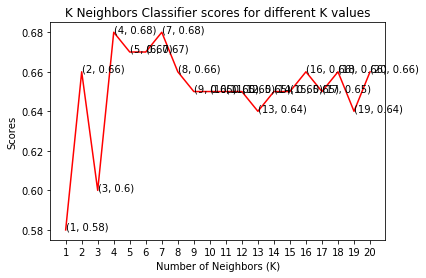

In [0]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [0]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

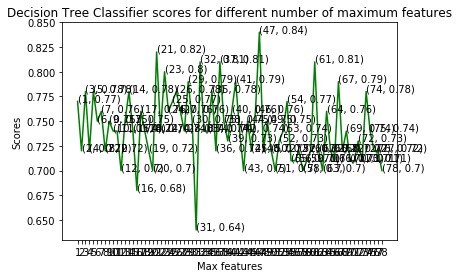

In [0]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [0]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

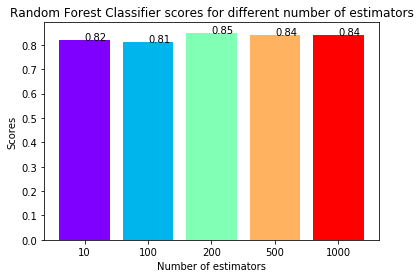

In [0]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')